In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
stock_data = pd.read_csv("stocks.csv")
stock_data["date"]= pd.to_datetime(stock_data["date"])

In [95]:
def get_sign(date): #Returns sign given a date tuple (month, day)
    astro_sign = ''
    if date[0] == 12:
        astro_sign = 'Sagittarius' if (date[1] < 22) else 'Capricorn'
    elif date[0] == 1:
        astro_sign = 'Capricorn' if (date[1] < 20) else 'Aquarius'
    elif date[0] == 2:
        astro_sign = 'Aquarius' if (date[1] < 19) else 'Pisces'
    elif date[0] == 3:
        astro_sign = 'Pisces' if (date[1] < 21) else 'Aries'
    elif date[0] == 4:
        astro_sign = 'Aries' if (date[1] < 20) else 'Taurus'
    elif date[0] == 5:
        astro_sign = 'Taurus' if (date[1] < 21) else 'Gemini'
    elif date[0] == 6:
        astro_sign = 'Gemini' if (date[1] < 21) else 'Cancer'
    elif date[0] == 7:
        astro_sign = 'Cancer' if (date[1] < 23) else 'Leo'
    elif date[0] == 8:
        astro_sign = 'Leo' if (date[1] < 23) else 'Virgo'
    elif date[0] == 9:
        astro_sign = 'Virgo' if (date[1] < 23) else 'Libra'
    elif date[0] == 10:
        astro_sign = 'Libra' if (date[1] < 23) else 'Scorpio'
    elif date[0] == 11:
        astro_sign = 'Scorpio' if (date[1] < 22) else 'Sagittarius'
    return astro_sign

In [96]:
#Used to find the largest group of values above or below the top or bottom 25% lines
def get_mask(array):
    start_ind, end_ind, max_ind, i = 0, 1, 0, 0
    true_list = []
    while i < len(array):
        if array[i]:
            start_ind = i
            while array[i]:
                end_ind += 1
                i += 1
                if i == len(array):
                    break
            my_tuple = (start_ind, end_ind)
            true_list.append(my_tuple)
            i -= 1
        end_ind = 1
        i += 1
    
    max_val = true_list[0][1]
    for i in range(len(true_list)):
        if true_list[i][1] > max_val:
            max_ind = i
            max_val = true_list[i][1]
    
    mask = np.zeros_like(array)
    mask[true_list[max_ind][0]:true_list[max_ind][0]+true_list[max_ind][1]] = True
    
    return mask

In [121]:
#Gets 3 signs for the top and bottom 25% values
def get_sign_list(array): 
    start_tuple = (int(str(array[0])[5:7]), int(str(array[0])[8:10]))
    middle_tuple = (int(str(array[len(array) // 2])[5:7]), int(str(array[len(array) // 2])[8:10]))
    end_tuple = (int(str(array[-1])[5:7]), int(str(array[-1])[8:10]))
    return [get_sign(start_tuple), get_sign(middle_tuple), get_sign(end_tuple)]
    

In [122]:
#Stock plotting and sign labeling function
def plot_stock(stock_name):
    stock_max = np.max(np.array(stock_data[stock_name]))
    stock_min = np.min(np.array(stock_data[stock_name]))
    stock_avg = np.mean(np.array(stock_data[stock_name]))

    y = np.array(stock_data[stock_name])
    x = np.array(stock_data['date'])

    max_ind = np.where(y == stock_max)[0][0]

    min_ind = np.where(y == stock_min)[0][0]
    
    stock_data['top_25'] = y >= np.percentile(y, 75)
    top_array = np.array(stock_data['top_25'])
    
    stock_data['bottom_25'] = y <= np.percentile(y, 25)
    bottom_array = np.array(stock_data['bottom_25'])
    

    top_mask = get_mask(top_array)
    bottom_mask = get_mask(bottom_array)
    
    plt.figure(figsize=(13,9))
    plt.plot(x, y, color = 'green')
    plt.plot(x[max_ind], y[max_ind], marker = 'o', color = 'r', ms = 15, label = 'Max Value')
    plt.plot(x[min_ind], y[min_ind], marker = 'o', color = 'b', ms = 15, label = 'Min Value')
    plt.scatter(x[top_mask],y[top_mask], marker = 'x', color = 'red', label = 'Largest Group Above 25%')
    plt.scatter(x[bottom_mask],y[bottom_mask], marker = 'x', color = 'blue', label = 'Largest Group Below 25%')
    plt.axhline(y = np.nanmean(y), color = 'purple', linestyle = '--', linewidth = 3, label = 'Avg')
    plt.axhline(y = np.percentile(y, 75), color = 'red', linestyle = '--', linewidth = 3, label = 'Top 25%')
    plt.axhline(y = np.percentile(y, 25), color = 'blue', linestyle = '--', linewidth = 3, label = 'Bottom 25%')
    plt.xlabel('Date (YYYY-MM-DD)', fontsize = 13, fontweight = 'bold')
    plt.ylabel('Stock Value (USD)', fontsize = 13, fontweight = 'bold')
    plt.title(stock_name, fontsize = 18, fontweight = 'bold')
    plt.legend()
    
    buy_signs = get_sign_list(x[bottom_mask])
    sell_signs = get_sign_list(x[top_mask])
    return buy_signs, sell_signs

Buy during: ['Scorpio', 'Libra', 'Virgo']
Sell during: ['Scorpio', 'Libra', 'Virgo']


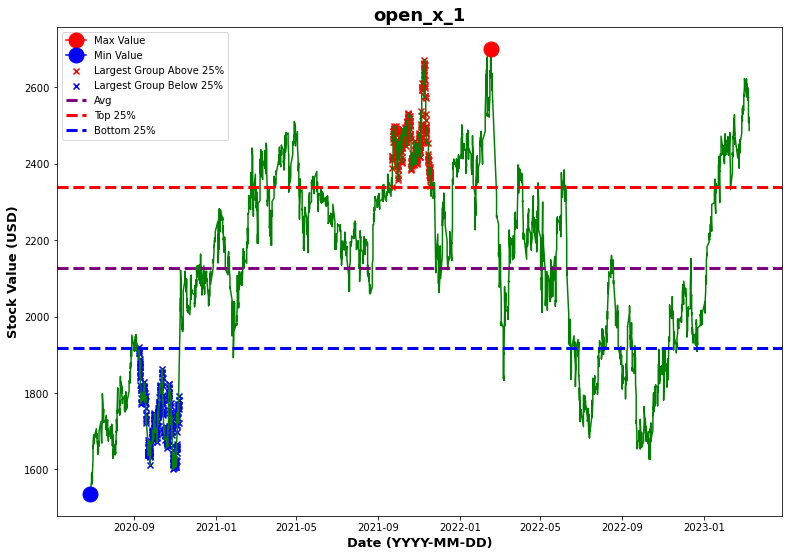

In [123]:
#Example
buy_list, sell_list = plot_stock('open_x_1')
print("Buy during:", buy_list)
print("Sell during:", sell_list)

In [124]:
name_list = list(stock_data.columns.values)

Buy during: ['Sagittarius', 'Scorpio', 'Libra']
Sell during: ['Libra', 'Leo', 'Cancer']
Buy during: ['Sagittarius', 'Scorpio', 'Libra']
Sell during: ['Libra', 'Leo', 'Cancer']
Buy during: ['Capricorn', 'Scorpio', 'Libra']
Sell during: ['Libra', 'Leo', 'Cancer']
Buy during: ['Sagittarius', 'Scorpio', 'Libra']
Sell during: ['Libra', 'Leo', 'Cancer']
Buy during: ['Cancer', 'Cancer', 'Cancer']
Sell during: ['Pisces', 'Pisces', 'Pisces']
Buy during: ['Capricorn', 'Libra', 'Cancer']
Sell during: ['Libra', 'Virgo', 'Leo']
Buy during: ['Capricorn', 'Libra', 'Cancer']
Sell during: ['Libra', 'Virgo', 'Leo']
Buy during: ['Capricorn', 'Libra', 'Cancer']
Sell during: ['Libra', 'Virgo', 'Leo']
Buy during: ['Capricorn', 'Libra', 'Cancer']
Sell during: ['Libra', 'Virgo', 'Leo']
Buy during: ['Cancer', 'Cancer', 'Cancer']
Sell during: ['Taurus', 'Taurus', 'Taurus']
Buy during: ['Scorpio', 'Libra', 'Virgo']
Sell during: ['Scorpio', 'Libra', 'Virgo']
Buy during: ['Scorpio', 'Libra', 'Virgo']
Sell during: 

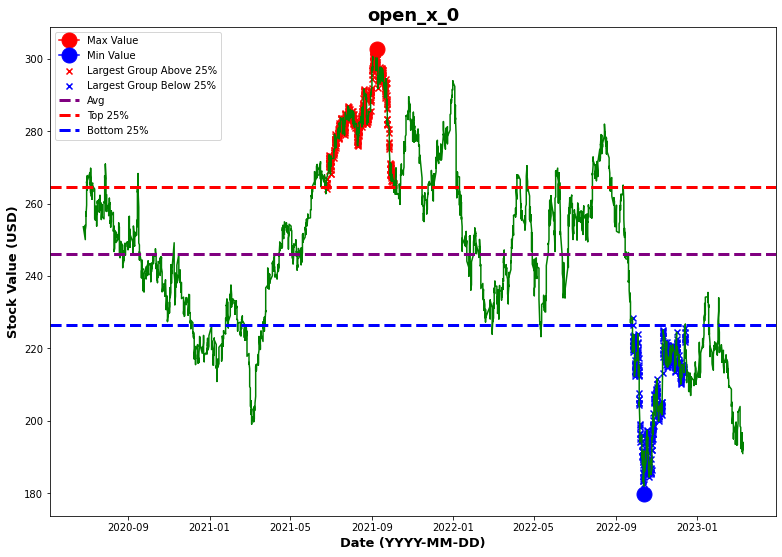

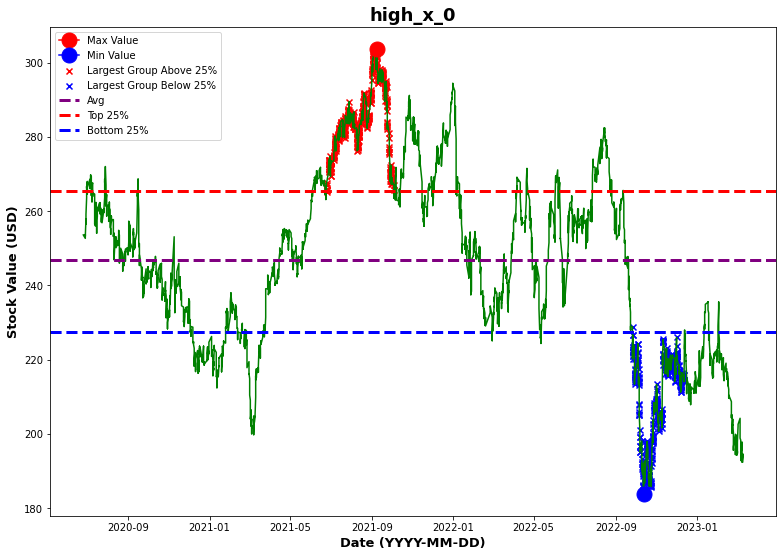

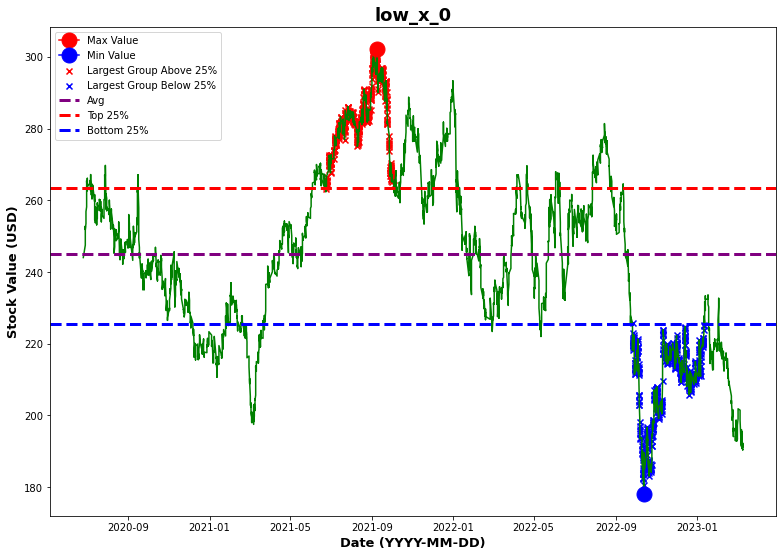

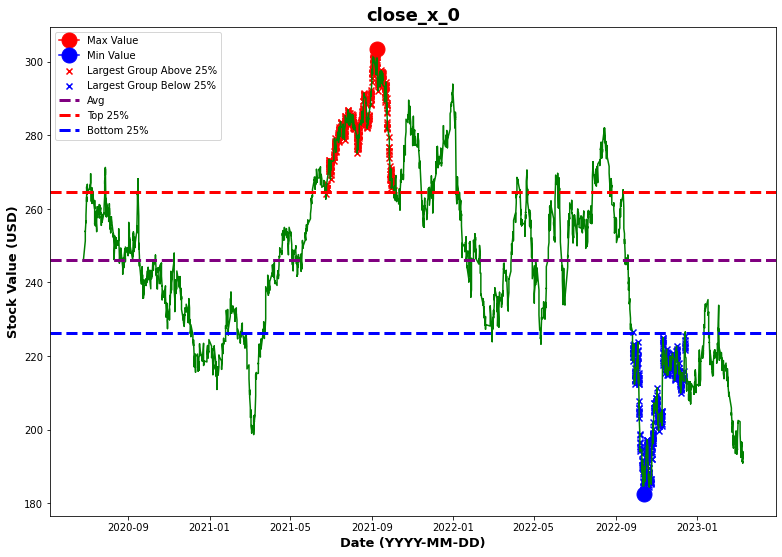

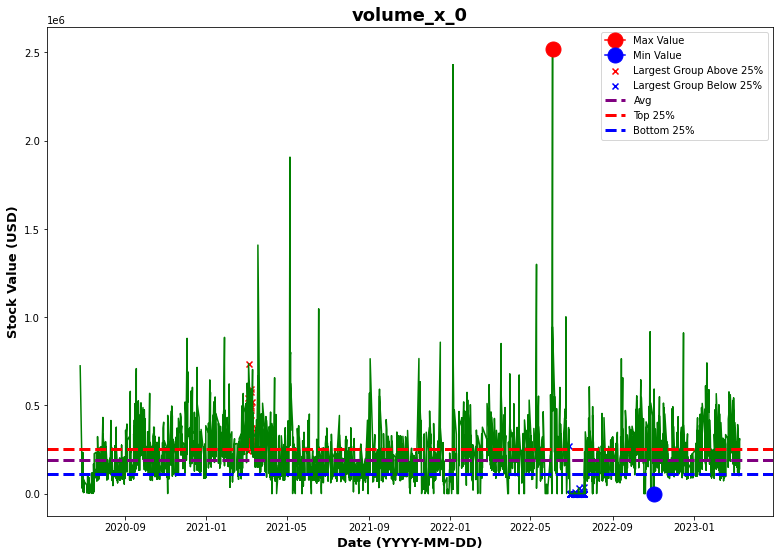

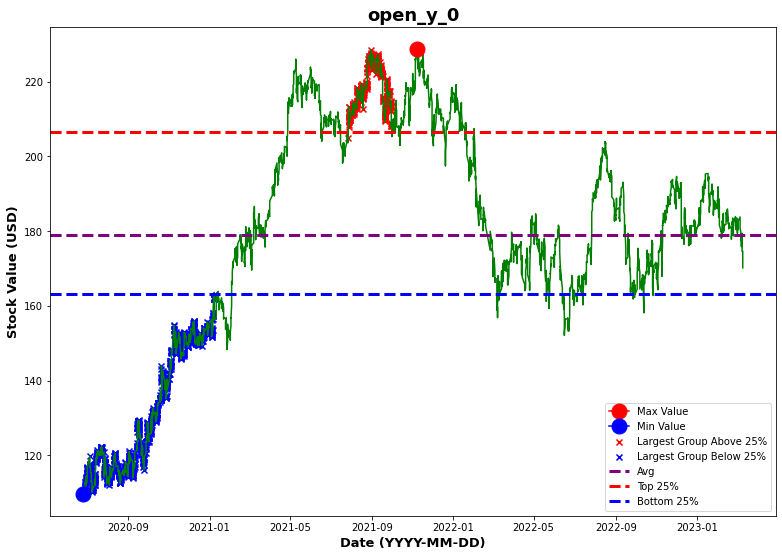

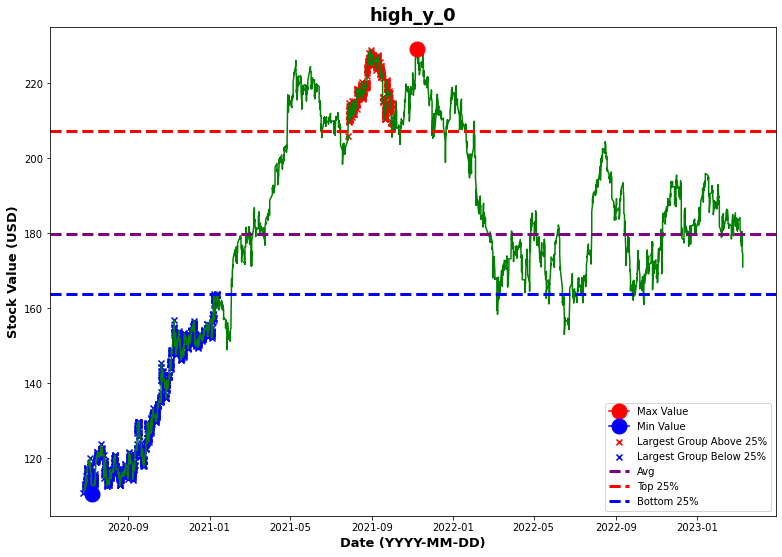

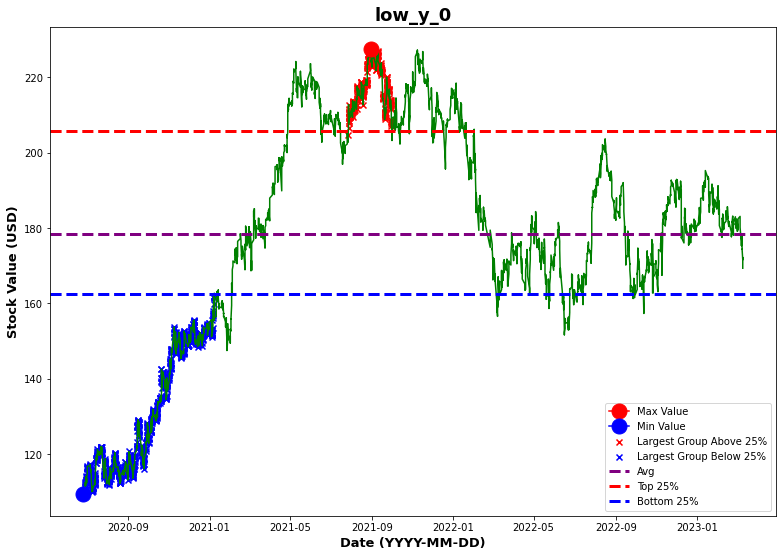

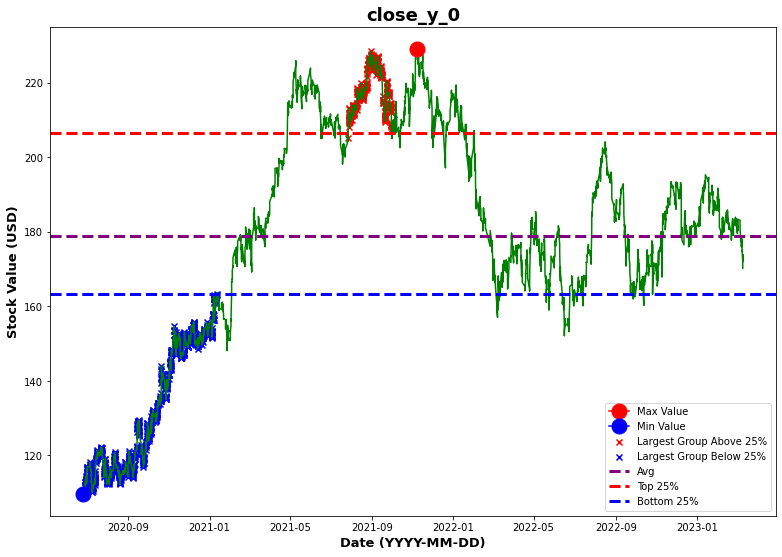

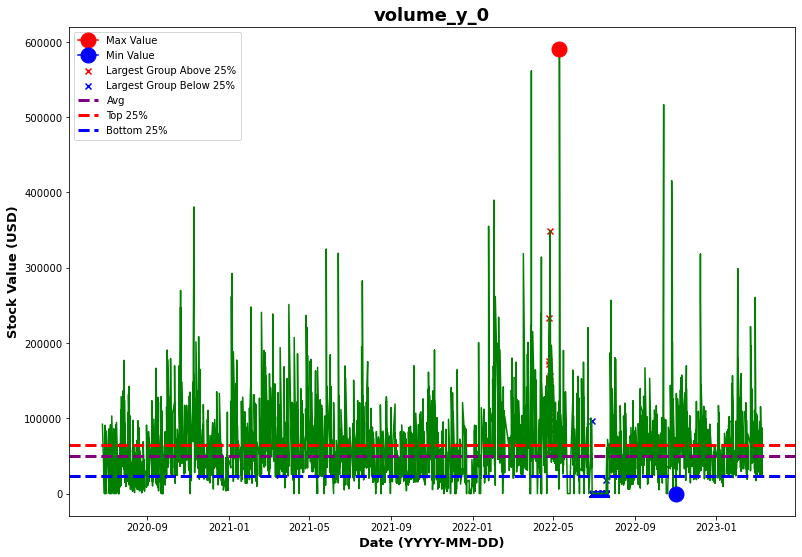

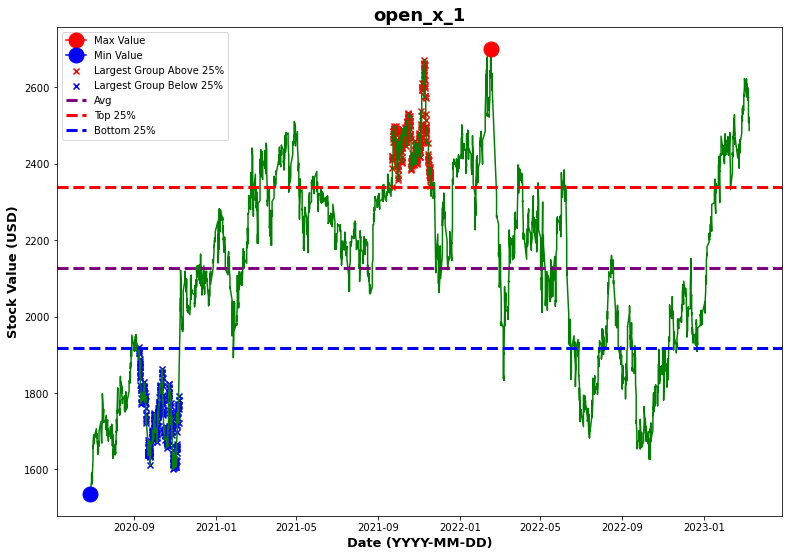

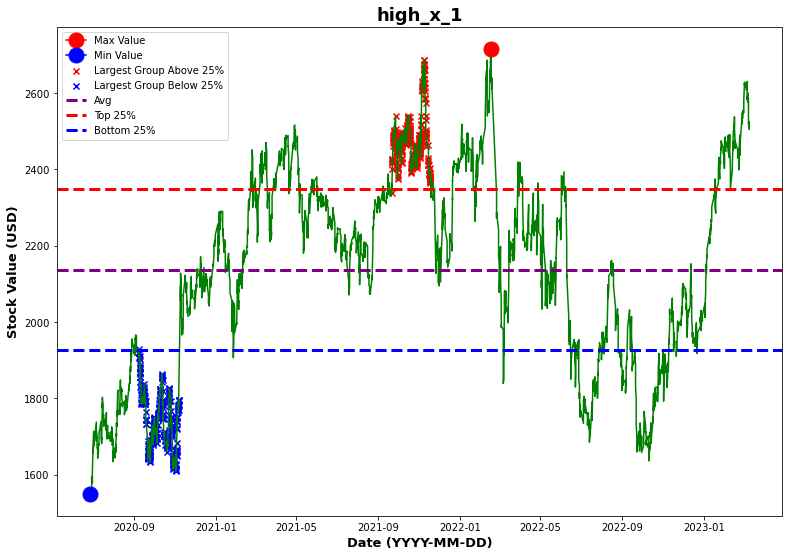

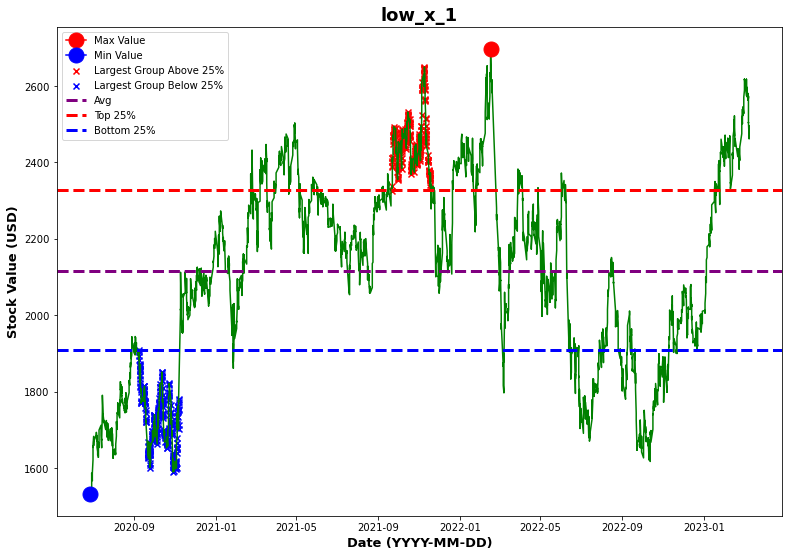

In [125]:
for i in range(2,len(name_list) // 7):
    buy_list, sell_list = plot_stock(name_list[i])
    print("Buy during:", buy_list)
    print("Sell during:", sell_list)
    